# Corporate Actions

<div class="alert alert-block alert-info">
This is part of the OQD offering. Available in OneTick Cloud. Can be configured on prem.
</div>

# Adjusting prices for corporate actions

We can use built-in functions to adjust price and volume for corporate actions. 

We follow an example of a 1:15 split for MKD on May 23, 2022. First let's review the unadjusted data: there appears to be a price jump.

<Axes: xlabel='Time'>

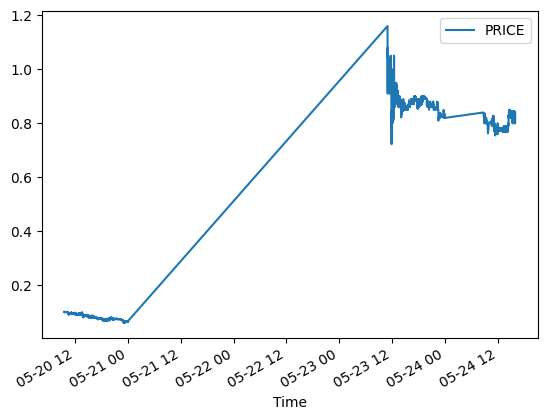

In [2]:
import onetick.py as otp
import matplotlib

trd = otp.DataSource('NYSE_TAQ', tick_type='TRD', start=otp.dt(2022, 5, 20, 9, 30), end=otp.dt(2022, 5, 24, 16))
t = otp.run(trd, symbols='MKD')
t.plot(x='Time', y='PRICE')

Adding adjustment for corporate actions fixes this. The prices are adjusted to the level before or after the split depending on the value of the `adjustement_date` parameter. The next two examples illustrate this.

<Axes: xlabel='Time'>

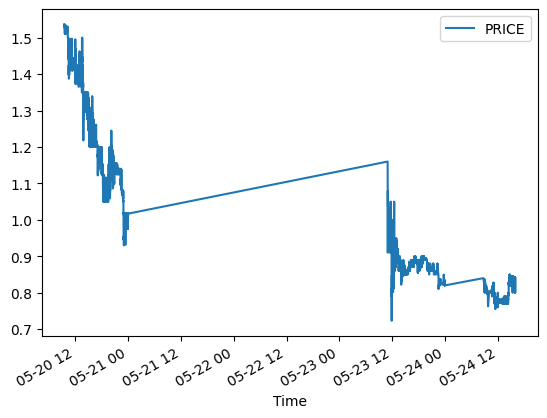

In [14]:
trd = otp.DataSource('NYSE_TAQ',
                     tick_type='TRD',
                     start=otp.dt(2022, 5, 20, 9, 30),
                     end=otp.dt(2022, 5, 24, 16))
trd = otp.functions.corp_actions(trd,
                                 adjustment_date=20220524,
                                 fields="PRICE")

r = otp.run(trd, symbols='MKD', symbol_date=otp.dt(2022, 5, 20))
r.plot(x='Time', y='PRICE')

<Axes: xlabel='Time'>

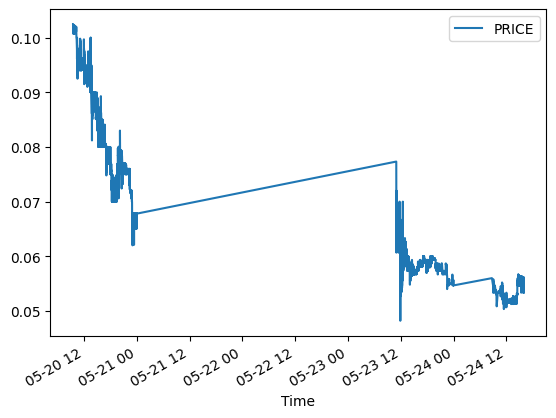

In [15]:
trd = otp.DataSource('NYSE_TAQ',
                     tick_type='TRD',
                     start=otp.dt(2022, 5, 20, 9, 30),
                     end=otp.dt(2022, 5, 24, 16))
trd = otp.functions.corp_actions(trd,
                                 adjustment_date=20220520,
                                 fields="PRICE")

r = otp.run(trd, symbols='MKD', symbol_date=otp.dt(2022, 5, 20))
r.plot(x='Time', y='PRICE')

Adjustment can be applied to sizes in a similar way.

<Axes: xlabel='Time'>

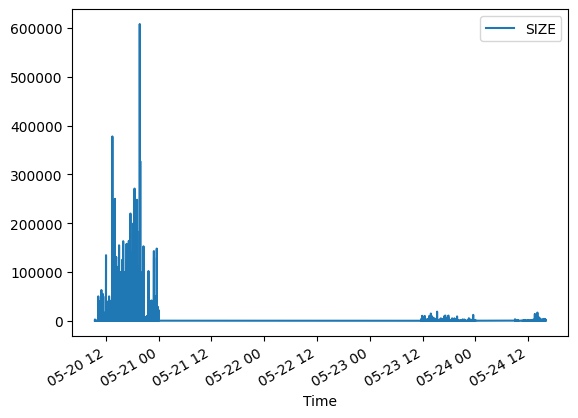

In [16]:
trd = otp.DataSource('NYSE_TAQ',
                     tick_type='TRD',
                     start=otp.dt(2022, 5, 20, 9, 30),
                     end=otp.dt(2022, 5, 24, 16))

r = otp.run(trd, symbols='MKD', symbol_date=otp.dt(2022, 5, 20))
r.plot(x='Time', y='SIZE')

<Axes: xlabel='Time'>

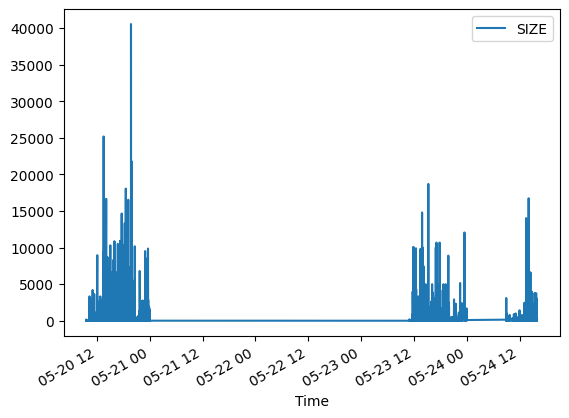

In [9]:
trd = otp.DataSource('NYSE_TAQ',
                     tick_type='TRD',
                     start=otp.dt(2022, 5, 20, 9, 30),
                     end=otp.dt(2022, 5, 24, 16))
trd = otp.functions.corp_actions(trd,
                                 adjustment_date=20220524,
                                 adjust_rule='SIZE',
                                 fields='SIZE')

r = otp.run(trd, symbols='MKD', symbol_date=otp.dt(2022, 5, 20))
r.plot(x='Time', y='SIZE')

# Retrieving Corporate actions for a symbol
We can retrieve all corporate actions for the symbols of interest.

In [31]:
cacs = otp.oqd.sources.CorporateActions()

cacs = otp.merge([cacs], symbols=['TDEQ::::MKD', 'TDEQ::::AAPL'], identify_input_ts=True)

otp.run(cacs, start=otp.dt(2020, 5, 1), end=otp.dt(2023, 4, 10), symbol_date=otp.dt(2022, 2, 1))

Time     OID  ACTION_ID    ACTION_TYPE  ACTION_ADJUST ACTION_CURRENCY  ANN_DATE   EX_DATE  PAY_DATE  REC_DATE                 TERM_NOTE TERM_RECORD_TYPE ACTION_STATUS   SYMBOL_NAME TICK_TYPE
0  2020-05-08    9706   16118282  CASH_DIVIDEND       0.820000             USD  20200430  20200508  20200514  20200511             CASH:0.82@USD                         NORMAL  TDEQ::::AAPL      CACS
1  2020-08-07    9706   16330650  CASH_DIVIDEND       0.820000             USD  20200730  20200807  20200813  20200810             CASH:0.82@USD                         NORMAL  TDEQ::::AAPL      CACS
2  2020-08-31    9706   16330651          SPLIT       0.250000                  20200730  20200831  20200828  20200824     STOCK:3.00000000@9706                         NORMAL  TDEQ::::AAPL      CACS
3  2020-11-06    9706   16558868  CASH_DIVIDEND       0.205000             USD  20201029  20201106  20201112  20201109            CASH:0.205@USD                         NORMAL  TDEQ::::AAPL      CACS
4  2021-02-05    9706   16799540  CASH_DIVIDEND       0.205000             USD  20210127  20210205  20210211  20210208            CASH:0.205@USD                         NORMAL  TDEQ::::AAPL      CACS
5  2021-05-07    9706   17098817  CASH_DIVIDEND       0.220000             USD  20210428  20210507  20210513  20210510             CASH:0.22@USD                         NORMAL  TDEQ::::AAPL      CACS
6  2021-08-06    9706   17331864  CASH_DIVIDEND       0.220000             USD  20210727  20210806  20210812  20210809             CASH:0.22@USD                         NORMAL  TDEQ::::AAPL      CACS
7  2021-11-05    9706   17522810  CASH_DIVIDEND       0.220000             USD  20211028  20211105  20211111  20211108             CASH:0.22@USD                         NORMAL  TDEQ::::AAPL      CACS
8  2022-02-04    9706   17597137  CASH_DIVIDEND       0.220000             USD  20220127  20220204  20220210  20220207             CASH:0.22@USD                         NORMAL  TDEQ::::AAPL      CACS
9  2022-05-06    9706   17640491  CASH_DIVIDEND       0.230000             USD  20220428  20220506  20220512  20220509             CASH:0.23@USD                         NORMAL  TDEQ::::AAPL      CACS
10 2022-05-23  688935   17653162          SPLIT      14.999992                  19100101  20220523  20220523  20220523  STOCK:-0.93333330@688935                         NORMAL   TDEQ::::MKD      CACS
11 2022-08-05    9706   17685165  CASH_DIVIDEND       0.230000             USD  20220728  20220805  20220811  20220808             CASH:0.23@USD                         NORMAL  TDEQ::::AAPL      CACS
12 2022-11-04    9706   17728529  CASH_DIVIDEND       0.230000             USD  20221027  20221104  20221110  20221107             CASH:0.23@USD                         NORMAL  TDEQ::::AAPL      CACS
13 2023-02-10    9706   17801892  CASH_DIVIDEND       0.230000             USD  20230202  20230210  20230216  20230213             CASH:0.23@USD                         NORMAL  TDEQ::::AAPL      CACS